<a href="https://colab.research.google.com/github/Abhieo07/Basics_ml/blob/main/NNbasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview of Nerul Network
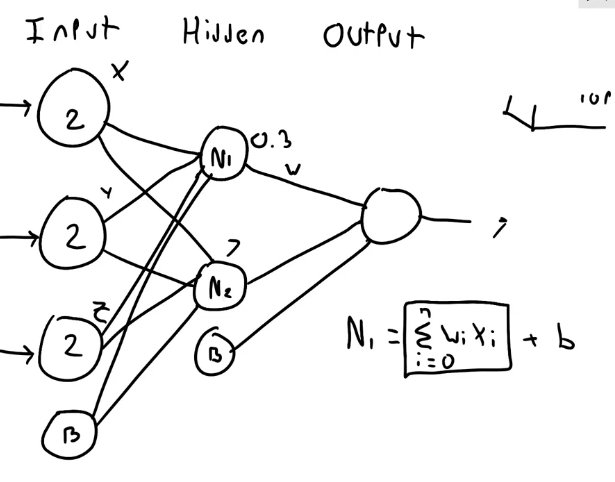

#Activation Function
    To increase more complexity
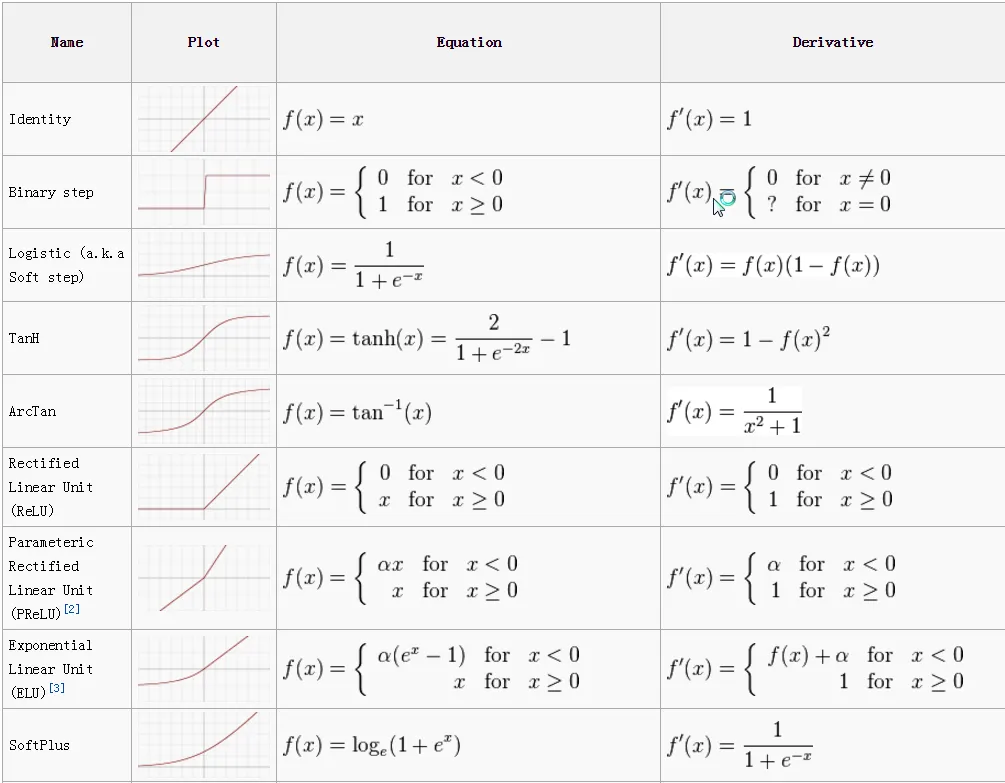

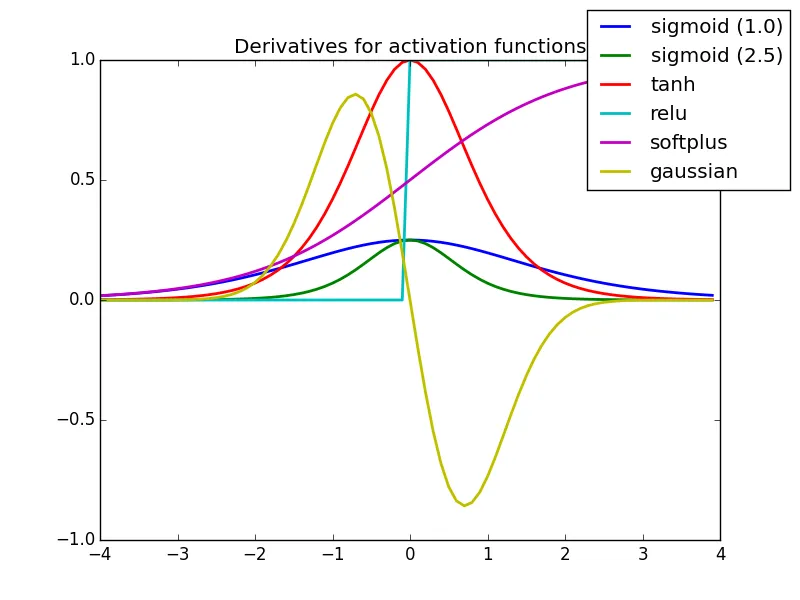

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Optimizer

A function that implements the gradient descent and backpropagation algorithms for you.

#Creating Neural Network

**Dataset**

For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 for validation/testing.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Let's have a look at this data to see what we are working with.

In [ ]:
train_images.shape

(60000, 28, 28)

So we've got 60,000 images that are made up of 28X28 pixels(784 in total)

In [ ]:
# Let's have a look at one pixel
train_images[0,23,23]

194

Our pixel values are between 0 amd 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels

In [ ]:
# Let's have a look at first 10 training labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integer ranging from 0-9. Each integer represent a specific article of clothing. We'll create an array of label names to indicate which is which

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Finally Let's look at what some of these images look like!

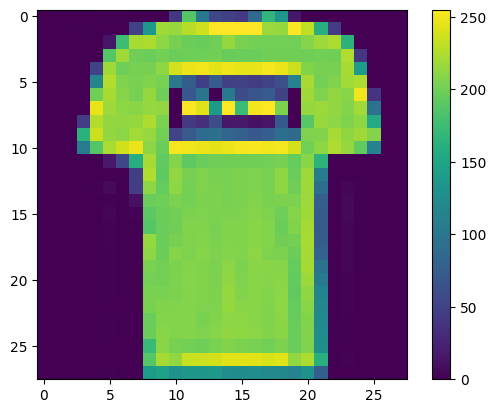

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

**Data Preproccessing**

We will scale all our greyscale pixel values
(0-255) to be between 0 and 1.


In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

Building the Model


This model represent a feed-forward neural network(one that passes values from left to right).

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),    # input layer(1)
    keras.layers.Dense(128, activation='relu'),   # hidden layer(2)
    keras.layers.Dense(10, activation='softmax')  # output layer(3)
])

Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3785 - accuracy: 0.8626
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3352 - accuracy: 0.8782
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3114 - accuracy: 0.8863
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2936 - accuracy: 0.8915
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2805 - accuracy: 0.8964
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2690 - accuracy: 0.8997
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2585 - accuracy: 0.9038
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2457 - accuracy: 0.9075
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2386 - accuracy: 0.9107
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.23

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8857
Test accuracy:  0.885699987411499


In [ ]:
# To make prediction we simply need to pass an array to data in the form we've specified in the input layer to .predict() method

predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


This will return array of predictions for each image we've passed. Let's look at the predictions for image 1

In [ ]:
predictions[0]

array([3.0450683e-06, 1.7496588e-09, 4.9005738e-10, 7.6452999e-13,
       1.9400399e-07, 4.4785076e-04, 1.9507578e-09, 1.2469763e-03,
       1.5727014e-08, 9.9830198e-01], dtype=float32)

Ankle boot
Ankle boot


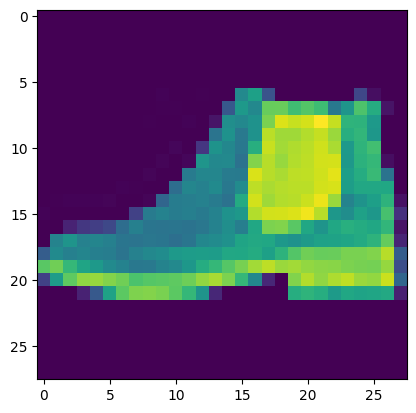

In [ ]:
print(class_names[np.argmax(predictions[2])])
plt.imshow(test_images[2])
print(class_names[test_labels[2]])

#Verifying Predictions



Pick  a number: 256
1/1 [==============================] - 0s 23ms/step


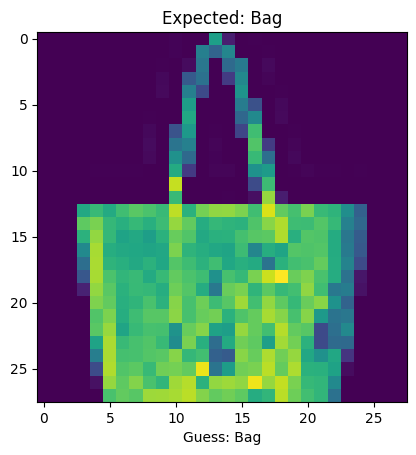

In [ ]:
def predict(model, image, label):
  prediction = model.predict(np.array([image]))
  guess = class_names[np.argmax(prediction)]
  plt.imshow(image)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: "+ guess)

def get_num():
  while True:
    num = input("Pick  a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_num()
image = test_images[num]
label = test_labels[num]
predict(model, image, class_names[label])